In [37]:
import time
import threading
import matplotlib.pyplot as plt
import moviepy.editor as mp

In [18]:
from contextlib import contextmanager
import os
import sys

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [13]:
def task(video_path, audio_path):
    clip = mp.VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path)

In [14]:
def normal(videos, audios):
    for i in range(len(videos)):
        task(videos[i], audios[i])

In [15]:
def threaded(videos, audios, thread_num):
    active=threading.active_count()
    
    for i in range(len(videos)):
        t=threading.Thread(target=task, args=(videos[i], audios[i]))
        t.start()
        
        while True:
            if threading.active_count() -active <thread_num:
                break
            time.sleep(0.1)
        
    while True:
        if threading.active_count()==active:
            break
        time.sleep(0.2)

In [24]:
videos=[r"./Video/30.mp4",r"./Video/Taiwan.mp4", r"./Video/Anime.mp4", r"./Video/Donut.mp4", r"./Video/Timer.mp4"]*5
audios=[r"./Audio/a1.mp3", r"./Audio/a2.mp3", r"./Audio/a3.mp3", r"./Audio/a4.mp3", r"./Audio/a5.mp3"]*5

In [58]:
start_time=time.time()
with suppress_stdout():
    normal(videos, audios)
normal_time=time.time()-start_time

start_time=time.time()
with suppress_stdout():
    threaded(videos, audios, 3)
threaded_time=time.time()-start_time

Done!


In [26]:
print(normal_time)
print(threaded_time)

28.573166847229004
17.73190975189209


In [55]:
x_pts=[i for i in range(1,9)]
y_pts=[]

In [59]:
for i in x_pts:
    start_time=time.time()
    with suppress_stdout():
        threaded(videos, audios, i)
    threaded_time=time.time()-start_time
    y_pts.append(threaded_time)

Done!


In [53]:
print(y_pts)

[25.41462254524231, 17.102109909057617, 16.82979106903076, 15.06760311126709, 16.263898134231567, 16.186928272247314, 19.194945096969604, 23.079854249954224, 22.01010274887085, 22.81423044204712, 22.43060827255249, 20.806889295578003, 18.143310070037842, 17.783998012542725, 19.044073820114136]


Text(0.5, 1.0, 'Number of threads vs Time')

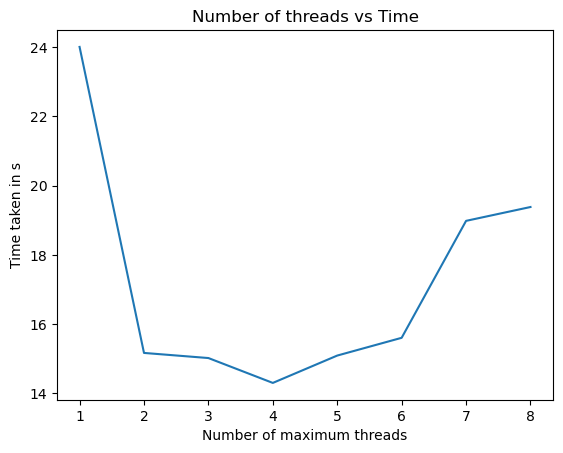

In [57]:
plt.plot(x_pts, y_pts)
plt.xlabel("Number of maximum threads")
plt.ylabel("Time taken in s")
plt.title("Number of threads vs Time")